In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Analysing Crime

In [2]:
crimes=pd.read_csv('crime.csv')
crimes

,STATE/UT,YEAR,Pupose,Total No. of cases reported,Male upto 10 years,Female upto 10 years,Male 10-15 years,Female 10-15 years,Male 15-18 years,Female 15-18 years,Male 18-30 years,Female 18-30 years,Male 30-50 years,Female 30-50 years,Male above 50 years,Female above 50 years,Total Male,Total Female,Grand Total
0,Andhra Pradesh,2001,For Adoption,8,3,1,0,0,0,0,0,4,0,0,0,0,3,5,8
1,Andhra Pradesh,2001,For Begging,2,0,0,2,0,0,0,0,0,0,0,0,0,2,0,2
2,Andhra Pradesh,2001,For Camel racing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Andhra Pradesh,2001,For Illicit intercourse,78,0,2,0,25,0,24,0,25,0,2,0,0,0,78,78
4,Andhra Pradesh,2001,For marriage,339,0,0,0,73,1,164,6,91,0,4,0,0,7,332,339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5861,Puducherry,2012,For Selling body parts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5862,Puducherry,2012,For Slavery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5863,Puducherry,2012,For unlawaful activity,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5864,Puducherry,2012,Others,8,2,4,1,1,0,0,0,0,0,0,0,0,3,5,8


In [3]:
# checking null values

crimes.isnull().sum()

STATE/UT                       0
YEAR                           0
Pupose                         0
Total No. of cases reported    0
Male upto 10 years             0
Female upto 10 years           0
Male 10-15 years               0
Female 10-15 years             0
Male 15-18 years               0
Female 15-18 years             0
Male 18-30 years               0
Female 18-30 years             0
Male 30-50 years               0
Female 30-50 years             0
Male above 50 years            0
Female above 50 years          0
Total Male                     0
Total Female                   0
Grand Total                    0
dtype: int64

In [4]:
# lets check the basic statistics of the data
crimes.describe()

,YEAR,Total No. of cases reported,Male upto 10 years,Female upto 10 years,Male 10-15 years,Female 10-15 years,Male 15-18 years,Female 15-18 years,Male 18-30 years,Female 18-30 years,Male 30-50 years,Female 30-50 years,Male above 50 years,Female above 50 years,Total Male,Total Female,Grand Total
count,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000
mean,2006.513126,121.667917,1.802932,1.216161,2.426526,6.320491,2.510740,19.857143,16.400614,52.993863,8.548585,9.842823,0.955336,0.363450,32.644732,90.593931,123.238663
std,3.445978,465.198526,16.321285,9.121776,30.860644,36.194204,17.738711,117.901238,75.366121,218.121242,36.858145,54.903563,7.395493,6.547786,141.072094,377.255718,469.614659
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2010.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,4.000000,7.000000,22.000000
max,2012.000000,8878.000000,408.000000,209.000000,953.000000,906.000000,530.000000,3081.000000,1371.000000,3682.000000,1042.000000,1053.000000,334.000000,332.000000,2465.000000,7919.000000,8888.000000


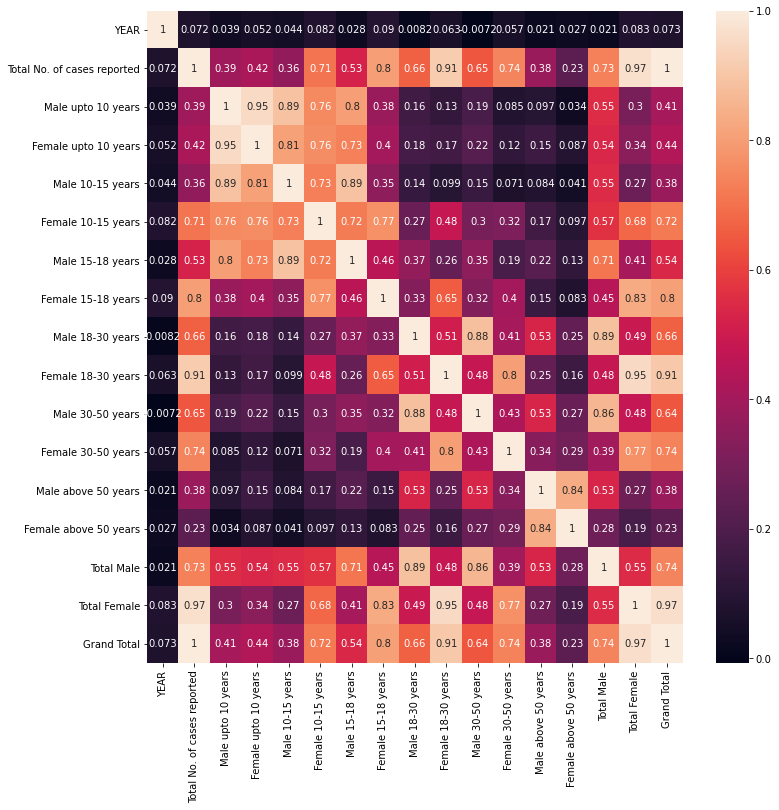

In [5]:
# correlation heatmap

import seaborn as sns
corr_hmap=crimes.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [6]:
# lets check the columns in the crimes table
crimes.columns

Index(['STATE/UT', 'YEAR', 'Pupose', 'Total No. of cases reported',
       'Male upto 10 years', 'Female upto 10 years', 'Male 10-15 years',
       'Female 10-15 years', 'Male 15-18 years', 'Female 15-18 years',
       'Male 18-30 years', 'Female 18-30 years', 'Male 30-50 years',
       'Female 30-50 years', 'Male above 50 years', 'Female above 50 years',
       'Total Male', 'Total Female', 'Grand Total'],
      dtype='object')

In [7]:
# lets check the different types of Purposes in commiting crimes
crimes['Pupose'].value_counts()

For Adoption               420
For Prostitution           419
Total                      419
For Revenge                419
For Selling body parts     419
Others                     419
For Camel racing           419
For Sale                   419
For Illicit intercourse    419
For marriage               419
For Slavery                419
For Ransom                 419
For Begging                418
For unlawaful activity     418
For unlawful activity        1
Name: Pupose, dtype: int64

In [8]:
# lets check the years for which the data is present
crimes['YEAR'].value_counts()

2011    490
2007    490
2003    490
2010    490
2006    490
2002    490
2009    490
2005    490
2012    490
2008    490
2004    490
2001    476
Name: YEAR, dtype: int64

In [9]:
# lets try to check the crime purposes in the States of Andhra Pradesh

a = crimes[crimes['STATE/UT'] == 'Andhra Pradesh']
a = a.drop(['YEAR',
            'Total Female',
            'Grand Total',
            'Total Male'], axis = 1)
a = a.groupby(['Pupose']).agg('sum')
a = pd.DataFrame(a)
a = a.iloc[:-2, :]
a = pd.DataFrame(a)
a

,Total No. of cases reported,Male upto 10 years,Female upto 10 years,Male 10-15 years,Female 10-15 years,Male 15-18 years,Female 15-18 years,Male 18-30 years,Female 18-30 years,Male 30-50 years,Female 30-50 years,Male above 50 years,Female above 50 years
Pupose,,,,,,,,,,,,,
For Adoption,31,12,6,1,0,0,0,3,8,2,0,0,0
For Begging,43,5,3,5,2,0,0,22,1,1,4,0,0
For Camel racing,3,0,0,0,0,0,0,0,1,0,2,0,0
For Illicit intercourse,1486,0,16,1,193,2,367,22,758,9,116,0,4
For Prostitution,459,0,0,0,24,0,79,32,281,18,19,0,0
For Ransom,233,24,14,11,11,10,19,60,49,26,2,6,1
For Revenge,585,40,39,21,16,13,27,173,93,120,9,35,2
For Sale,49,7,8,5,3,0,7,0,17,0,6,0,0
For Selling body parts,0,0,0,0,0,0,0,0,0,0,0,0,0


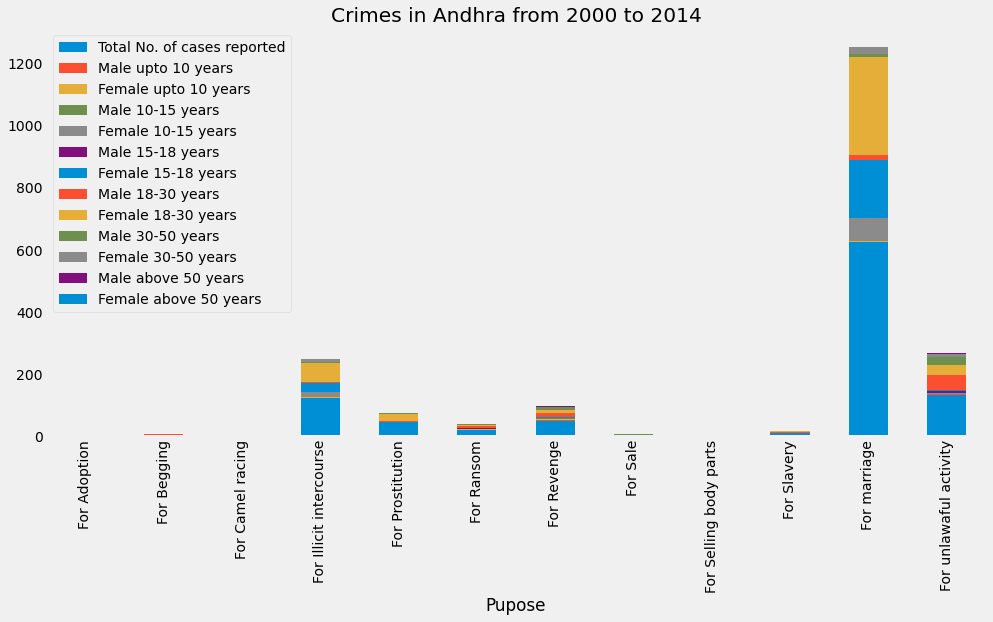

In [10]:

plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('fivethirtyeight')

a = crimes[crimes['STATE/UT'] == 'Andhra Pradesh']
a = a.drop(['YEAR',
            'Total Female',
            'Grand Total',
            'Total Male'], axis = 1)
a = a.groupby(['Pupose']).agg('mean')
a = pd.DataFrame(a)
a = a.iloc[:-2, :]
a = pd.DataFrame(a)
a.plot(kind = 'bar', 
       stacked = True)
       
plt.title('Crimes in Andhra from 2000 to 2014')
plt.legend()
plt.grid()
plt.show()

In [11]:
# lets make an interactive function to check crimes in every state of india

def check_crime(x):
    a = crimes[crimes['STATE/UT'] == x]
    a = a.drop(['YEAR',
                'Total Female',
                'Grand Total',
                'Total Male'], axis = 1)
    a = a.groupby(['Pupose']).agg('sum')
    a = pd.DataFrame(a)
    a = a.iloc[:-2, :]
    a = pd.DataFrame(a)
    return a

In [12]:
check_crime('Uttar Pradesh')

,Total No. of cases reported,Male upto 10 years,Female upto 10 years,Male 10-15 years,Female 10-15 years,Male 15-18 years,Female 15-18 years,Male 18-30 years,Female 18-30 years,Male 30-50 years,Female 30-50 years,Male above 50 years,Female above 50 years
Pupose,,,,,,,,,,,,,
For Adoption,34,6,1,0,1,2,1,17,3,3,0,0,0
For Begging,20,9,2,9,0,0,1,0,0,0,0,0,0
For Camel racing,0,0,0,0,0,0,0,0,0,0,0,0,0
For Illicit intercourse,13373,1,36,11,1155,20,3205,40,6973,111,1803,0,13
For Prostitution,110,0,0,0,2,4,31,1,65,0,7,0,0
For Ransom,1619,135,13,247,10,193,10,660,48,344,22,36,0
For Revenge,2461,25,22,71,35,235,54,1251,76,637,15,41,0
For Sale,25,1,1,0,4,0,11,5,1,2,0,0,0
For Selling body parts,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
check_crime('Karnataka')

,Total No. of cases reported,Male upto 10 years,Female upto 10 years,Male 10-15 years,Female 10-15 years,Male 15-18 years,Female 15-18 years,Male 18-30 years,Female 18-30 years,Male 30-50 years,Female 30-50 years,Male above 50 years,Female above 50 years
Pupose,,,,,,,,,,,,,
For Adoption,20,3,1,0,1,0,0,8,2,5,0,0,0
For Begging,15,3,1,2,2,0,1,2,1,0,3,0,0
For Camel racing,2,0,0,0,0,0,0,0,2,0,0,0,0
For Illicit intercourse,61,0,3,0,6,0,11,2,37,1,5,0,0
For Prostitution,40,0,1,0,2,0,11,2,29,3,2,2,0
For Ransom,193,22,4,6,3,5,3,76,40,45,2,7,0
For Revenge,151,1,7,3,5,9,3,80,15,31,3,4,0
For Sale,2,1,1,0,0,0,0,0,0,0,0,0,0
For Selling body parts,0,0,0,0,0,0,0,0,0,0,0,0,0


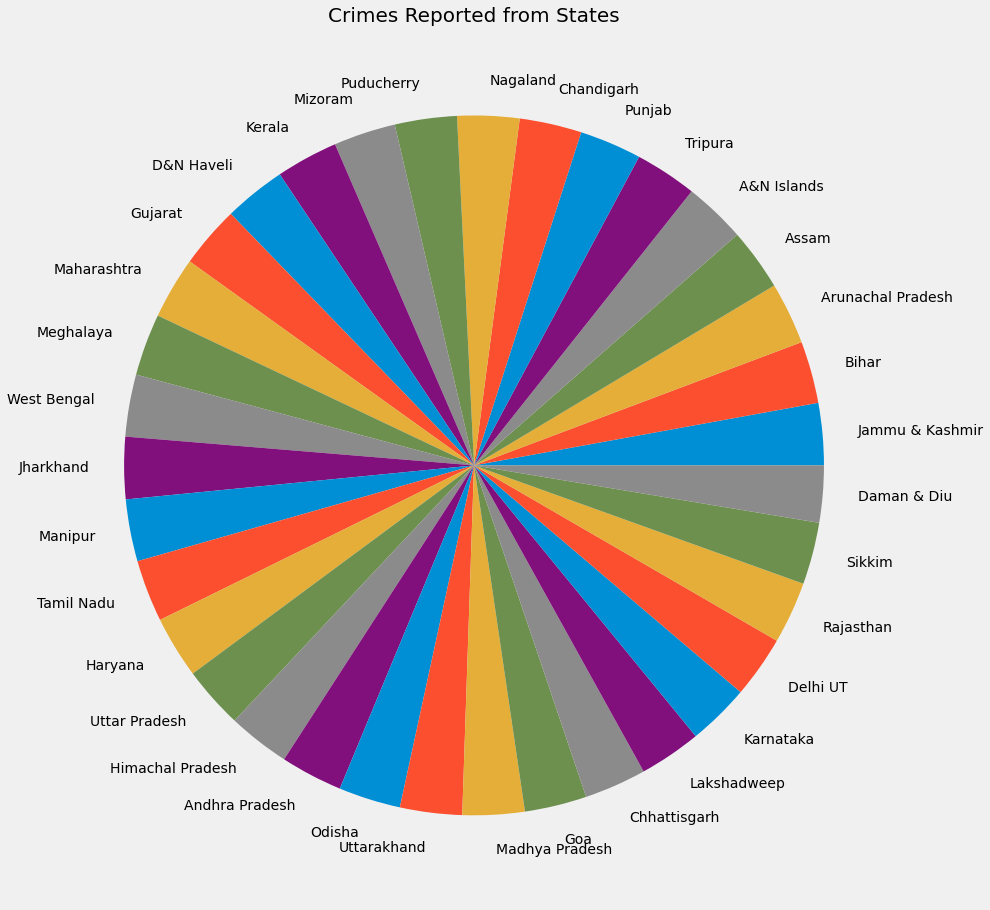

In [14]:
# lets check the States for which these crimes are being reported
plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fivethirtyeight')
crimes['STATE/UT'].value_counts().plot(kind = 'pie')
plt.axis('off')
plt.title('Crimes Reported from States', fontsize = 20)
plt.show()

In [15]:
# lets check the number of states in the dataset
print('\n\n Value Counts :','\n', crimes['STATE/UT'].value_counts())
print(crimes['STATE/UT'].nunique())




 Value Counts : 
 Jammu & Kashmir      168
Bihar                168
Arunachal Pradesh    168
Assam                168
A&N Islands          168
Tripura              168
Punjab               168
Chandigarh           168
Nagaland             168
Puducherry           168
Mizoram              168
Kerala               168
D&N Haveli           168
Gujarat              168
Maharashtra          168
Meghalaya            168
West Bengal          168
Jharkhand            168
Manipur              168
Tamil Nadu           168
Haryana              168
Uttar Pradesh        168
Himachal Pradesh     168
Andhra Pradesh       168
Odisha               168
Uttarakhand          168
Madhya Pradesh       168
Goa                  168
Chhattisgarh         168
Lakshadweep          168
Karnataka            168
Delhi UT             168
Rajasthan            168
Sikkim               168
Daman & Diu          154
Name: STATE/UT, dtype: int64
35


In [16]:
x = crimes['STATE/UT']
x.value_counts().index

Index(['Jammu & Kashmir', 'Bihar', 'Arunachal Pradesh', 'Assam', 'A&N Islands',
       'Tripura', 'Punjab', 'Chandigarh', 'Nagaland', 'Puducherry', 'Mizoram',
       'Kerala', 'D&N Haveli', 'Gujarat', 'Maharashtra', 'Meghalaya',
       'West Bengal', 'Jharkhand', 'Manipur', 'Tamil Nadu', 'Haryana',
       'Uttar Pradesh', 'Himachal Pradesh', 'Andhra Pradesh', 'Odisha',
       'Uttarakhand', 'Madhya Pradesh', 'Goa', 'Chhattisgarh', 'Lakshadweep',
       'Karnataka', 'Delhi UT', 'Rajasthan', 'Sikkim', 'Daman & Diu'],
      dtype='object')

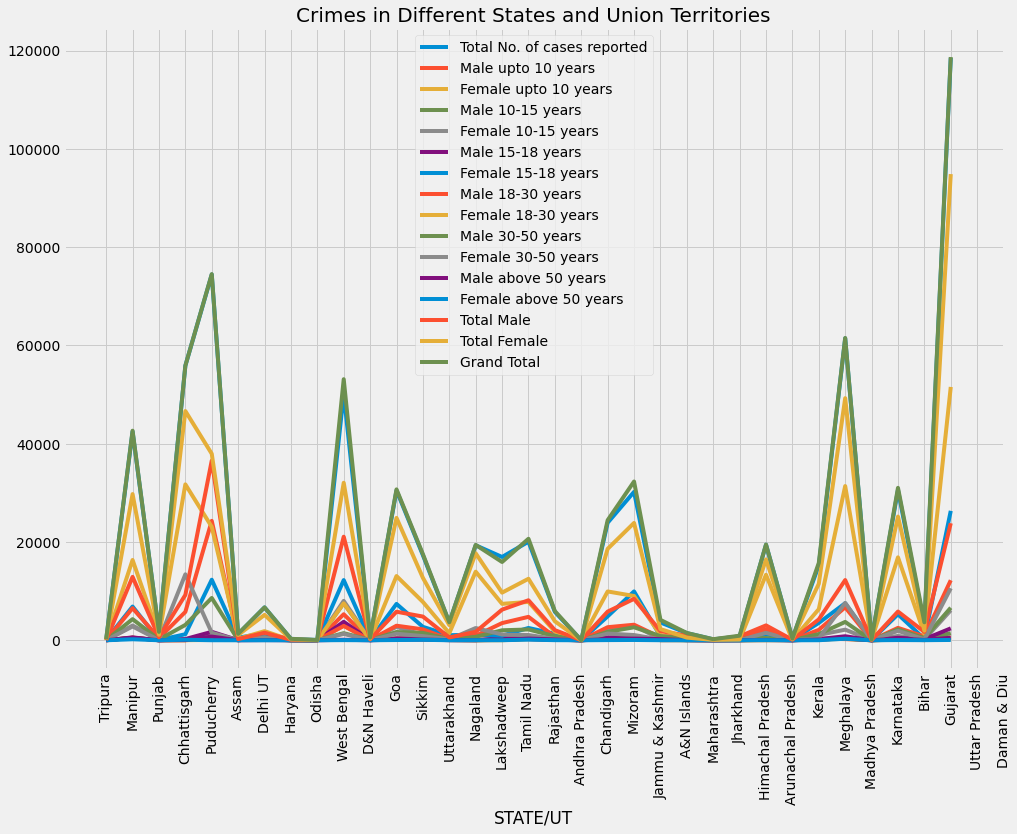

In [17]:
# lets check the crimes in a comparitive way

plt.rcParams['figure.figsize'] = (15, 11)
plt.style.use('fivethirtyeight')

x = crimes.groupby(['STATE/UT'])
x = x.agg('sum')[:-2]
x.drop(['YEAR'], axis = 1, inplace = True)
x = x.plot(kind = 'line')

plt.title('Crimes in Different States and Union Territories', fontsize = 20)
plt.xticks(np.arange(35), ('Tripura', 'Manipur', 'Punjab', 'Chhattisgarh', 'Puducherry', 'Assam',
       'Delhi UT', 'Haryana', 'Odisha', 'West Bengal', 'D&N Haveli', 'Goa',
       'Sikkim', 'Uttarakhand', 'Nagaland', 'Lakshadweep', 'Tamil Nadu',
       'Rajasthan', 'Andhra Pradesh', 'Chandigarh', 'Mizoram',
       'Jammu & Kashmir', 'A&N Islands', 'Maharashtra', 'Jharkhand',
       'Himachal Pradesh', 'Arunachal Pradesh', 'Kerala', 'Meghalaya',
       'Madhya Pradesh', 'Karnataka', 'Bihar', 'Gujarat', 'Uttar Pradesh',
       'Daman & Diu'),
        rotation = 90)
plt.show()

# Analyzing Rape cases

In [18]:
rape=pd.read_csv("rape.csv")
rape

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1045,West Bengal,2009,Victims of Incest Rape,3,0,0,1,1,1,3,0
1046,West Bengal,2009,Victims of Other Rape,2333,0,18,84,1834,391,2333,6
1047,West Bengal,2010,Total Rape Victims,2311,0,22,51,1779,459,2311,0
1048,West Bengal,2010,Victims of Incest Rape,4,0,1,0,2,1,4,0


In [19]:
rape.isnull().sum()

Area_Name                    0
Year                         0
Subgroup                     0
Rape_Cases_Reported          0
Victims_Above_50_Yrs         0
Victims_Between_10-14_Yrs    0
Victims_Between_14-18_Yrs    0
Victims_Between_18-30_Yrs    0
Victims_Between_30-50_Yrs    0
Victims_of_Rape_Total        0
Victims_Upto_10_Yrs          0
dtype: int64

In [20]:
rape.describe()

,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
count,1050.00000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,2005.50000,361.920000,1.866667,23.657143,53.085714,212.937143,60.236190,362.198095,10.415238
std,2.87365,592.180572,4.640286,50.677418,115.127899,350.135760,118.322713,592.418089,19.533134
min,2001.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.00000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000
50%,2005.50000,37.000000,0.000000,3.000000,5.000000,15.500000,4.000000,37.000000,2.000000
75%,2008.00000,527.500000,1.000000,19.000000,42.000000,308.000000,58.750000,531.500000,11.000000
max,2010.00000,3135.000000,43.000000,416.000000,826.000000,1835.000000,811.000000,3136.000000,131.000000


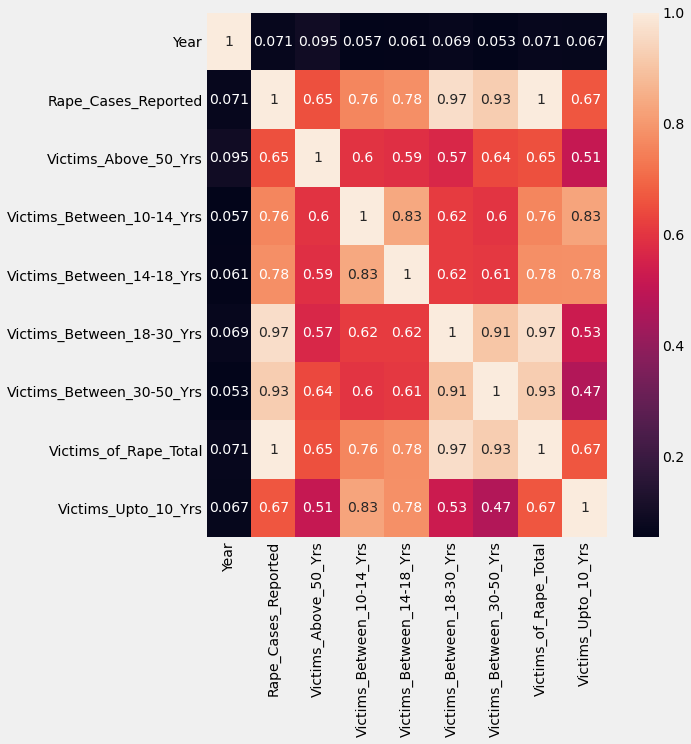

In [21]:
# heatmap correlation
import seaborn as sns
corr_hmap=rape.corr()
plt.figure(figsize=(8,9))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [22]:
#lets chcek the total of rape victims grouped by AREA and Subgroup
df_rape_group=rape.groupby(["Area_Name","Subgroup"]).agg({"Victims_of_Rape_Total":"sum"})
df_rape_group

Victims_of_Rape_Total
Area_Name                 Subgroup                                     
Andaman & Nicobar Islands Total Rape Victims                         84
                          Victims of Incest Rape                      1
                          Victims of Other Rape                      83
Andhra Pradesh            Total Rape Victims                      10696
                          Victims of Incest Rape                     70
...                                                                 ...
Uttarakhand               Victims of Incest Rape                     71
                          Victims of Other Rape                    1030
West Bengal               Total Rape Victims                      16378
                          Victims of Incest Rape                    211
                          Victims of Other Rape                   16167

[105 rows x 1 columns]

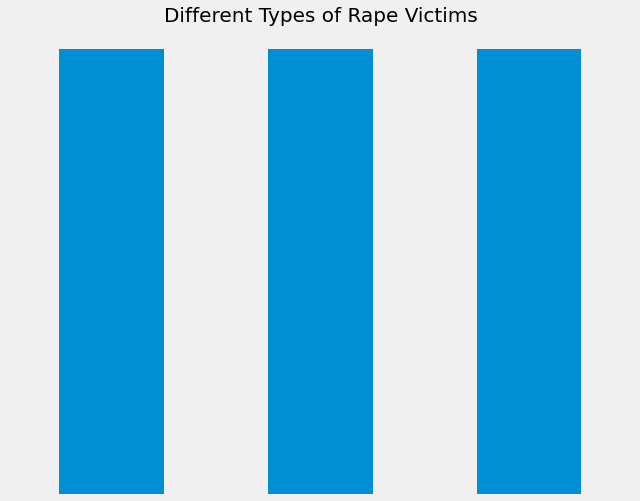

In [23]:
# lets check the victims categorywise

plt.rcParams['figure.figsize'] = (10, 8)
plt.style.use('fivethirtyeight')
rape['Subgroup'].value_counts().plot(kind = 'bar')
plt.title('Different Types of Rape Victims', fontsize = 20)
plt.axis('off')
plt.show()

In [24]:

# lets groupby the data wrt to the states

s = rape.groupby(['Area_Name'])
s = s.agg('sum')
s = pd.DataFrame(s)
s = s.drop(['Year'], axis = 1)
s

,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
Area_Name,,,,,,,,
Andaman & Nicobar Islands,168,0,16,88,42,8,168,14
Andhra Pradesh,21392,198,2510,4022,11262,2540,21392,860
Arunachal Pradesh,824,0,96,20,632,38,824,38
Assam,25524,190,306,818,17014,7104,25524,92
Bihar,22526,78,204,1000,16988,4194,22526,62
Chandigarh,454,0,92,104,150,48,456,62
Chhattisgarh,19502,226,2414,3986,8678,3608,19502,590
Dadra & Nagar Haveli,98,0,16,26,44,2,98,10
Daman & Diu,28,0,2,8,6,2,28,10


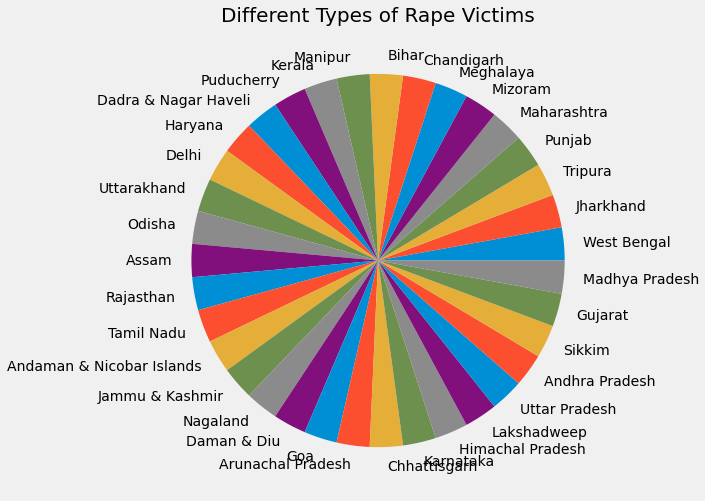

In [25]:
# lets check the victims categorywise

plt.rcParams['figure.figsize'] = (10, 8)
plt.style.use('fivethirtyeight')
rape['Area_Name'].value_counts().plot(kind = 'pie')
plt.title('Different Types of Rape Victims', fontsize = 20)
plt.axis('off')
plt.show()

In [26]:
a = rape['Area_Name']
a.value_counts().index

Index(['West Bengal', 'Jharkhand', 'Tripura', 'Punjab', 'Maharashtra',
       'Mizoram', 'Meghalaya', 'Chandigarh', 'Bihar', 'Manipur', 'Kerala',
       'Puducherry', 'Dadra & Nagar Haveli', 'Haryana', 'Delhi', 'Uttarakhand',
       'Odisha', 'Assam', 'Rajasthan', 'Tamil Nadu',
       'Andaman & Nicobar Islands', 'Jammu & Kashmir', 'Nagaland',
       'Daman & Diu', 'Goa', 'Arunachal Pradesh', 'Chhattisgarh', 'Karnataka',
       'Himachal Pradesh', 'Lakshadweep', 'Uttar Pradesh', 'Andhra Pradesh',
       'Sikkim', 'Gujarat', 'Madhya Pradesh'],
      dtype='object')

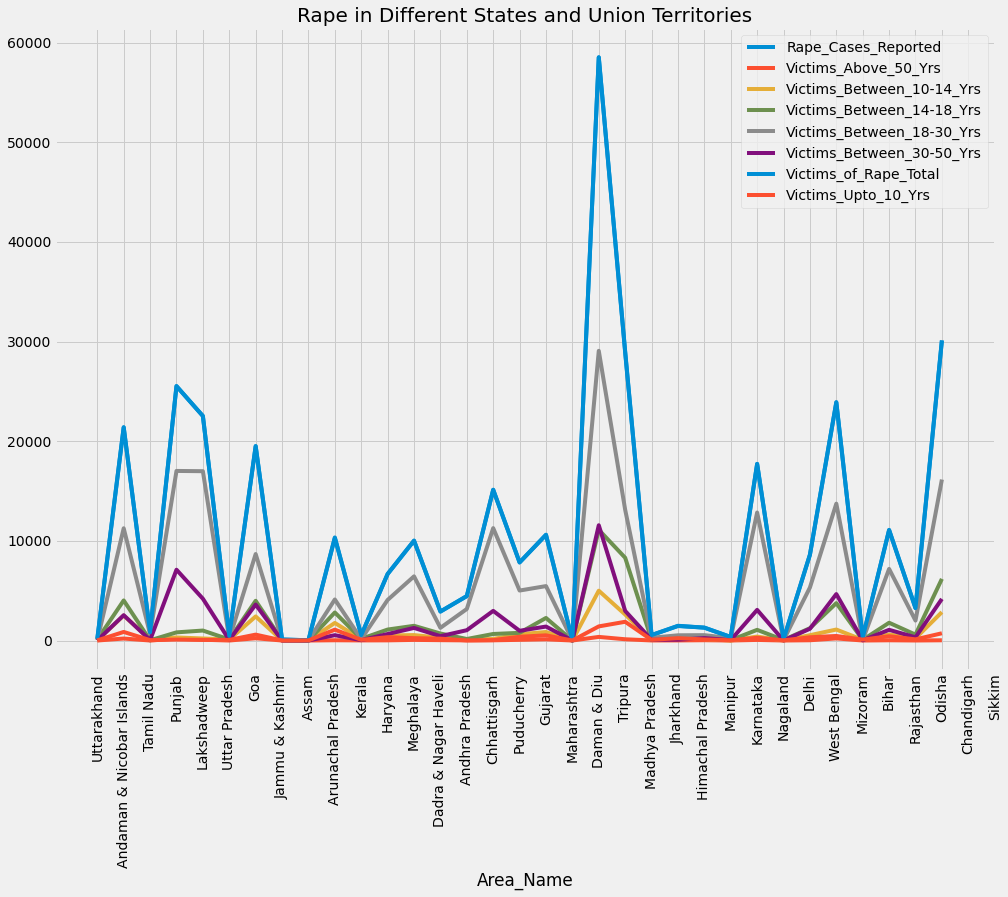

In [27]:
# lets check the rapecrimes in a comparitive way

plt.rcParams['figure.figsize'] = (15, 11)
plt.style.use('fivethirtyeight')

s = rape.groupby(['Area_Name'])
s = s.agg('sum')[:-2]
s.drop(['Year'], axis = 1, inplace = True)
s = s.plot(kind = 'line')

plt.title('Rape in Different States and Union Territories', fontsize = 20)
plt.xticks(np.arange(35), ('Uttarakhand', 'Andaman & Nicobar Islands', 'Tamil Nadu', 'Punjab',
       'Lakshadweep', 'Uttar Pradesh', 'Goa', 'Jammu & Kashmir', 'Assam',
       'Arunachal Pradesh', 'Kerala', 'Haryana', 'Meghalaya',
       'Dadra & Nagar Haveli', 'Andhra Pradesh', 'Chhattisgarh', 'Puducherry',
       'Gujarat', 'Maharashtra', 'Daman & Diu', 'Tripura', 'Madhya Pradesh',
       'Jharkhand', 'Himachal Pradesh', 'Manipur', 'Karnataka', 'Nagaland',
       'Delhi', 'West Bengal', 'Mizoram', 'Bihar', 'Rajasthan', 'Odisha',
       'Chandigarh', 'Sikkim'),
        rotation = 90)
plt.show()

# Analyzing Abducting Cases

In [28]:
abduction=pd.read_csv('abduction.csv')
abduction

,Area_Name,Year,No_of_Cases_in_which_offenders_were_known_to_the_Victims,No_of_Cases_in_which_offenders_were_Neighbours,No_of_Cases_in_which_offenders_were_Other_Known_persons,No_of_Cases_in_which_offenders_were_Parentsclose_family_members,No_of_Cases_in_which_offenders_were_Relatives
0,Madhya Pradesh,2007,3010,1397,1384,49,180
1,Madhya Pradesh,2008,2937,1279,1433,52,173
2,Madhya Pradesh,2009,2998,1254,1528,14,202
3,Madhya Pradesh,2010,3135,1223,1659,21,232
4,West Bengal,2010,2134,1037,987,4,106
...,...,...,...,...,...,...,...
345,Nagaland,2009,8,0,8,0,0
346,Puducherry,2009,1,0,1,0,0
347,Dadra & Nagar Haveli,2010,3,0,3,0,0
348,Lakshadweep,2010,0,0,0,0,0


In [29]:
abduction.isnull().sum()

Area_Name                                                          0
Year                                                               0
No_of_Cases_in_which_offenders_were_known_to_the_Victims           0
No_of_Cases_in_which_offenders_were_Neighbours                     0
No_of_Cases_in_which_offenders_were_Other_Known_persons            0
No_of_Cases_in_which_offenders_were_Parentsclose_family_members    0
No_of_Cases_in_which_offenders_were_Relatives                      0
dtype: int64

In [30]:
abduction.describe()

,Year,No_of_Cases_in_which_offenders_were_known_to_the_Victims,No_of_Cases_in_which_offenders_were_Neighbours,No_of_Cases_in_which_offenders_were_Other_Known_persons,No_of_Cases_in_which_offenders_were_Parentsclose_family_members,No_of_Cases_in_which_offenders_were_Relatives
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,2005.500000,481.297143,166.397143,270.728571,12.045714,32.120000
std,2.876393,616.285660,233.148389,343.931389,25.893504,48.580036
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,20.000000,4.000000,15.000000,0.000000,0.000000
50%,2005.500000,218.000000,61.000000,125.500000,3.000000,11.500000
75%,2008.000000,761.250000,233.500000,441.000000,13.750000,46.750000
max,2010.000000,3135.000000,1397.000000,1677.000000,301.000000,253.000000


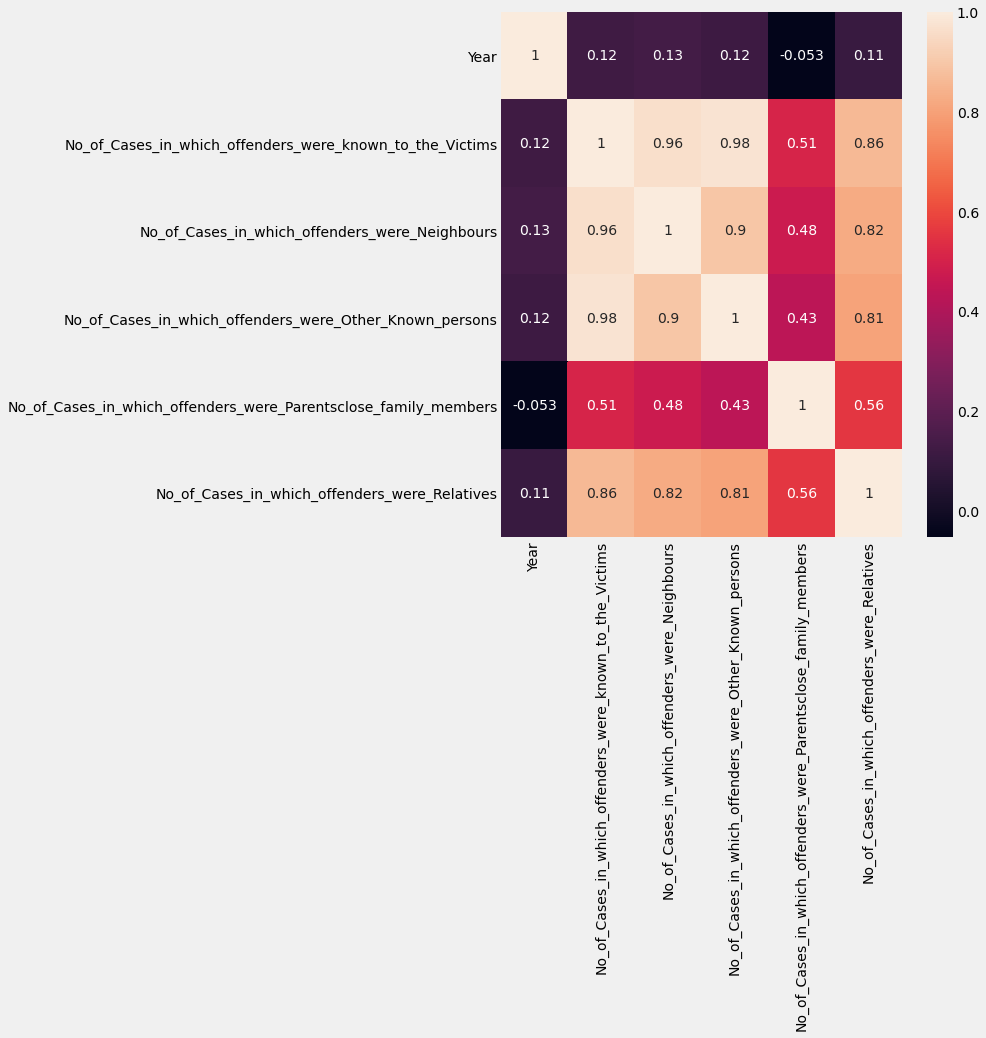

In [31]:
# heatmap correlation
import seaborn as sns
corr_hmap=abduction.corr()
plt.figure(figsize=(8,9))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [32]:
abduction.columns

Index(['Area_Name', 'Year',
       'No_of_Cases_in_which_offenders_were_known_to_the_Victims',
       'No_of_Cases_in_which_offenders_were_Neighbours',
       'No_of_Cases_in_which_offenders_were_Other_Known_persons',
       'No_of_Cases_in_which_offenders_were_Parentsclose_family_members',
       'No_of_Cases_in_which_offenders_were_Relatives'],
      dtype='object')

In [33]:
x1 = abduction['Area_Name']
x1.value_counts().index

Index(['West Bengal', 'Gujarat', 'Andhra Pradesh', 'Jharkhand', 'Sikkim',
       'Bihar', 'Kerala', 'Uttarakhand', 'Karnataka', 'Lakshadweep',
       'Nagaland', 'Haryana', 'Assam', 'Jammu & Kashmir', 'Manipur',
       'Madhya Pradesh', 'Chandigarh', 'Meghalaya', 'Rajasthan', 'Puducherry',
       'Delhi', 'Uttar Pradesh', 'Odisha', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Goa', 'Arunachal Pradesh', 'Mizoram', 'Tripura',
       'Tamil Nadu', 'Punjab', 'Chhattisgarh', 'Himachal Pradesh',
       'Maharashtra', 'Andaman & Nicobar Islands'],
      dtype='object')

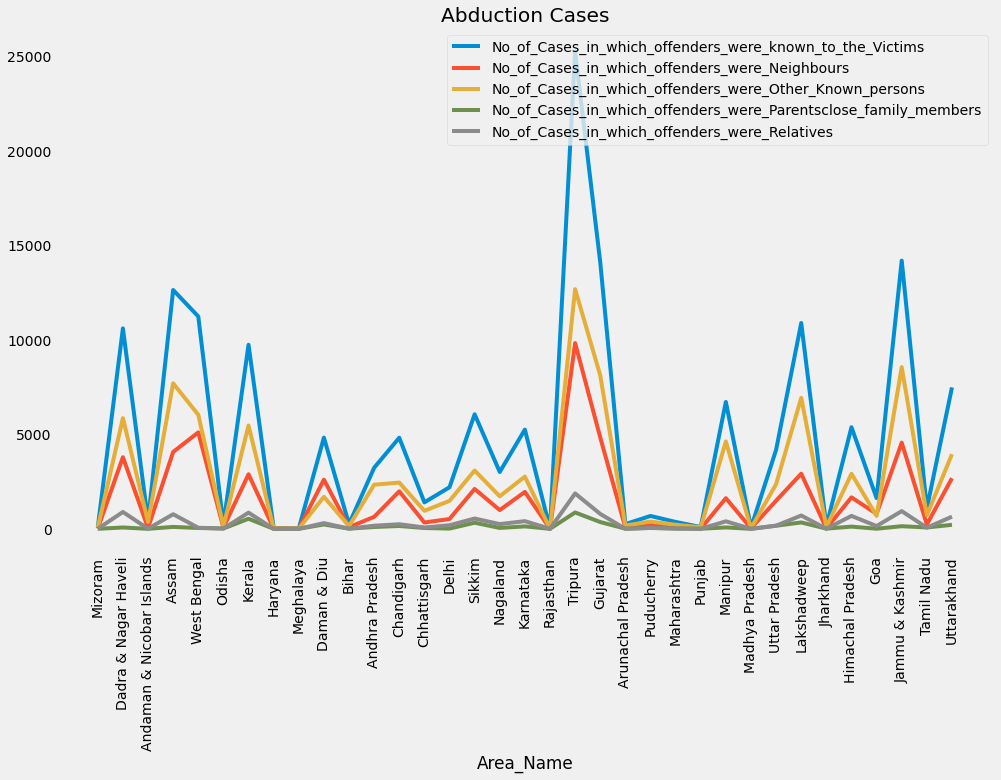

In [34]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

x1 = abduction.groupby('Area_Name').agg('sum')
x1 = x1.drop(['Year'], axis = 1)
x1.plot()
plt.grid()
plt.title('Abduction Cases')
plt.xticks(np.arange(35), ('Mizoram', 'Dadra & Nagar Haveli', 'Andaman & Nicobar Islands', 'Assam',
       'West Bengal', 'Odisha', 'Kerala', 'Haryana', 'Meghalaya',
       'Daman & Diu', 'Bihar', 'Andhra Pradesh', 'Chandigarh', 'Chhattisgarh',
       'Delhi', 'Sikkim', 'Nagaland', 'Karnataka', 'Rajasthan', 'Tripura',
       'Gujarat', 'Arunachal Pradesh', 'Puducherry', 'Maharashtra', 'Punjab',
       'Manipur', 'Madhya Pradesh', 'Uttar Pradesh', 'Lakshadweep',
       'Jharkhand', 'Himachal Pradesh', 'Goa', 'Jammu & Kashmir', 'Tamil Nadu',
       'Uttarakhand'),
        rotation = 90)
plt.show()

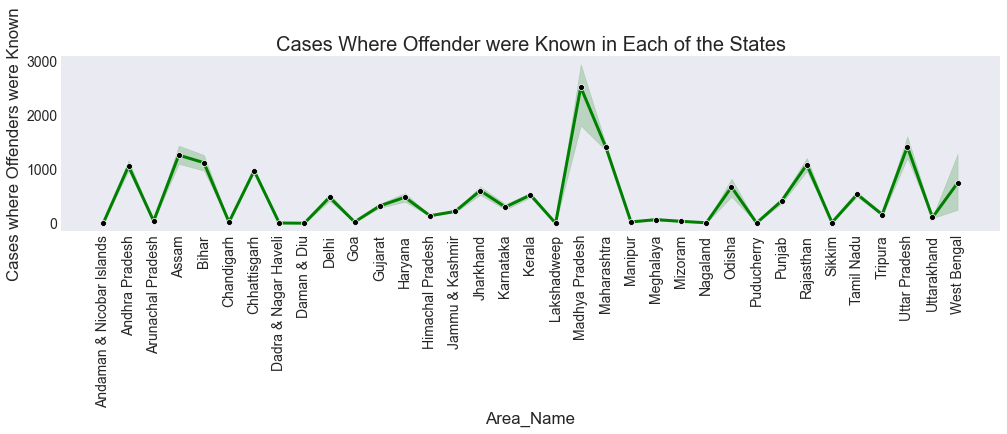

In [35]:

plt.rcParams['figure.figsize'] = (15, 3)
plt.style.use('seaborn-dark')
sns.lineplot(abduction['Area_Name'],
              abduction['No_of_Cases_in_which_offenders_were_known_to_the_Victims'],
            color = 'green',
            linewidth = 3,
             marker = 'o',
             mfc = 'black'
            )
plt.xticks(rotation = 90)
plt.ylabel('Cases where Offenders were Known')
plt.title('Cases Where Offender were Known in Each of the States', fontsize = 20)
plt.show()

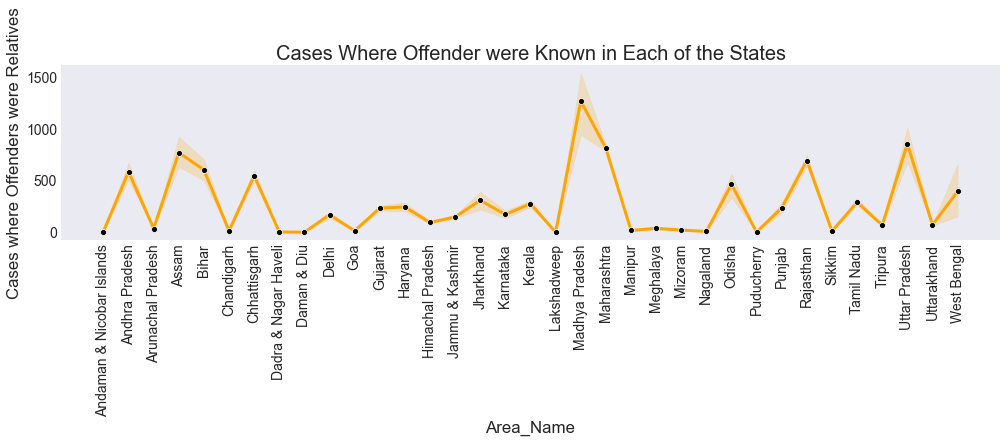

In [36]:
plt.rcParams['figure.figsize'] = (15, 3)
plt.style.use('seaborn-dark')
sns.lineplot(abduction['Area_Name'],
            abduction['No_of_Cases_in_which_offenders_were_Other_Known_persons'],
             color = 'orange',
             linewidth = 3,
             marker = 'o',
             mfc = 'black'
            )
plt.xticks(rotation = 90)
plt.ylabel('Cases where Offenders were Relatives')
plt.title('Cases Where Offender were Known in Each of the States', fontsize = 20)
plt.show()

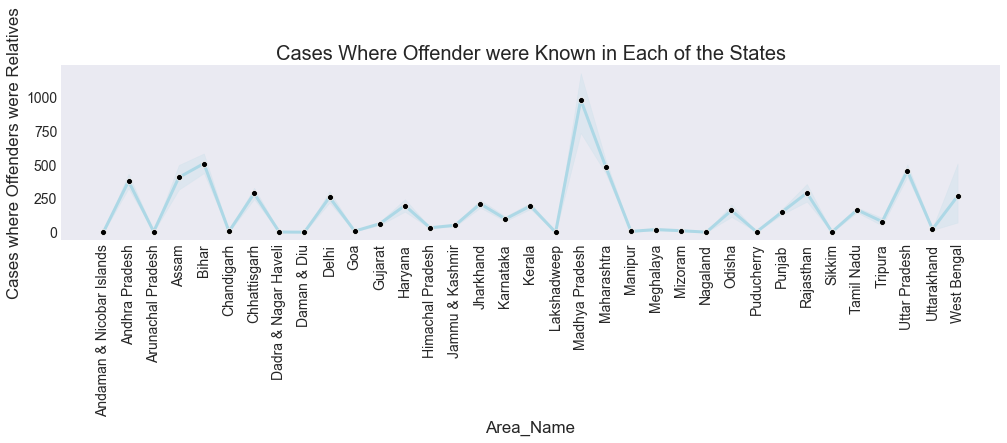

In [37]:
plt.rcParams['figure.figsize'] = (15, 3)
plt.style.use('seaborn-dark')
sns.lineplot(abduction['Area_Name'],
            abduction['No_of_Cases_in_which_offenders_were_Neighbours'],
             color = 'lightblue',
             linewidth = 3,
             marker = 'o',
             mfc = 'black'
            )
plt.xticks(rotation = 90)
plt.ylabel('Cases where Offenders were Relatives')
plt.title('Cases Where Offender were Known in Each of the States', fontsize = 20)
plt.show()

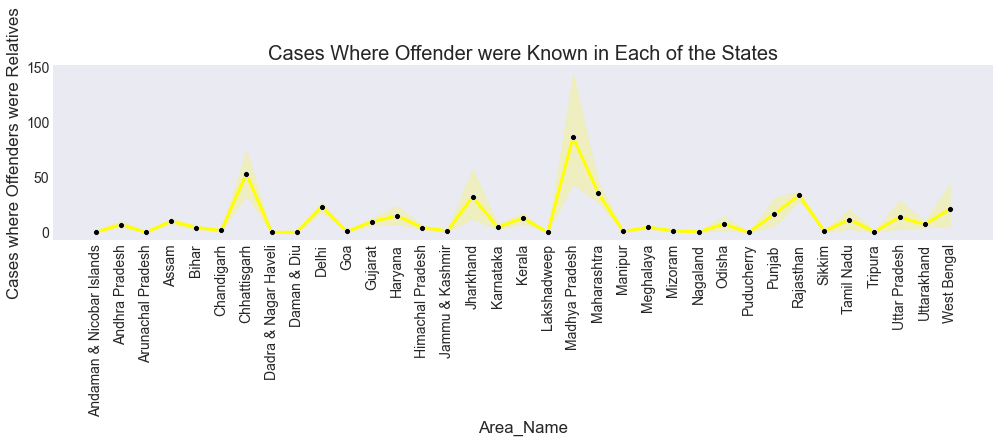

In [38]:
plt.rcParams['figure.figsize'] = (15, 3)
plt.style.use('seaborn-dark')
sns.lineplot(abduction['Area_Name'],
            abduction['No_of_Cases_in_which_offenders_were_Parentsclose_family_members'],
             color = 'yellow',
             linewidth = 3,
             marker = 'o',
             mfc = 'black'
            )
plt.xticks(rotation = 90)
plt.ylabel('Cases where Offenders were Relatives')
plt.title('Cases Where Offender were Known in Each of the States', fontsize = 20)
plt.show()


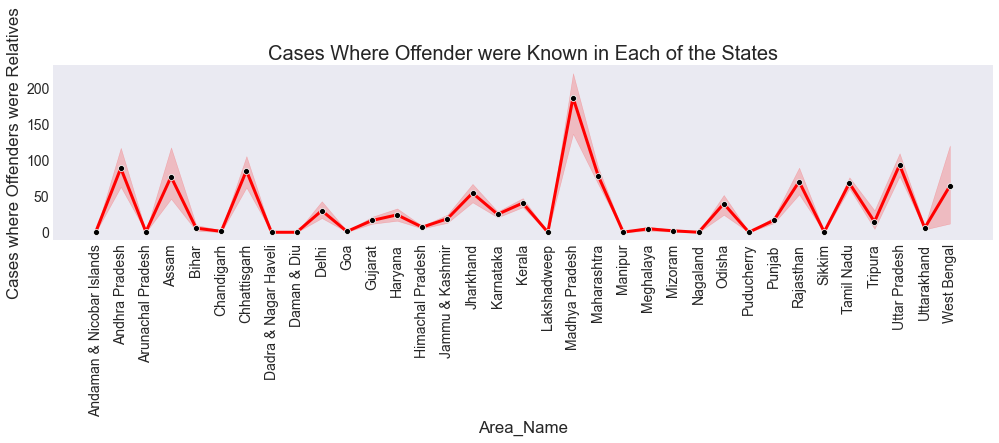

In [39]:
plt.rcParams['figure.figsize'] = (15, 3)
plt.style.use('seaborn-dark')
sns.lineplot(abduction['Area_Name'],
            abduction['No_of_Cases_in_which_offenders_were_Relatives'],
             color = 'red',
             linewidth = 3,
             marker = 'o',
             mfc = 'black'
            )
plt.xticks(rotation = 90)
plt.ylabel('Cases where Offenders were Relatives')
plt.title('Cases Where Offender were Known in Each of the States', fontsize = 20)
plt.show()

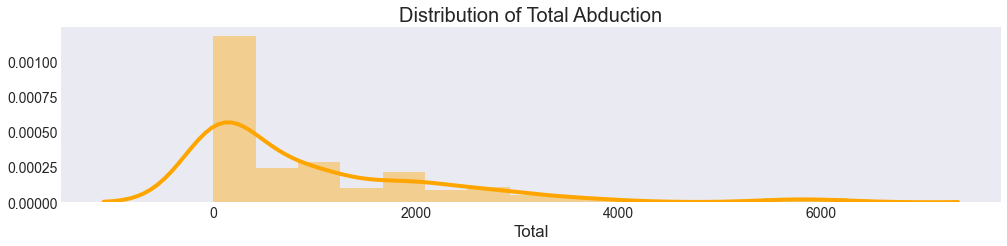

In [40]:
abduction['Total'] = abduction['No_of_Cases_in_which_offenders_were_known_to_the_Victims'] + \
                      abduction['No_of_Cases_in_which_offenders_were_Neighbours'] + \
                      abduction['No_of_Cases_in_which_offenders_were_Other_Known_persons'] + \
                       abduction['No_of_Cases_in_which_offenders_were_Parentsclose_family_members'] + \
                        abduction['No_of_Cases_in_which_offenders_were_Relatives']
# lets check the distribution of the total abduction crimes
sns.distplot(abduction['Total'], color = 'orange')
plt.title('Distribution of Total Abduction', fontsize = 20)
plt.show()


# Analysis on Murder Cases in 2013

In [41]:
murder=pd.read_csv('murder.csv')
murder

,STATE/UT,YEAR,GENDER,Upto 10 years,10-15 years,15-18 years,18-30 years,30-50 years,Above 50 years,Total
0,Andhra Pradesh,2013,Male,26,9,19,445,1036,199,1734
1,Andhra Pradesh,2013,Female,20,9,11,287,300,123,750
2,Andhra Pradesh,2013,Total,46,18,30,732,1336,322,2484
3,Arunachal Pradesh,2013,Male,0,0,1,32,31,1,65
4,Arunachal Pradesh,2013,Female,0,1,1,2,0,0,4
...,...,...,...,...,...,...,...,...,...,...
100,Lakshadweep,2013,Female,0,0,0,0,0,0,0
101,Lakshadweep,2013,Total,0,0,0,0,0,0,0
102,Puducherry,2013,Male,0,0,0,6,13,5,24
103,Puducherry,2013,Female,0,0,0,1,2,4,7


In [42]:
murder.isnull().sum()

STATE/UT          0
YEAR              0
GENDER            0
Upto 10 years     0
10-15 years       0
15-18 years       0
18-30 years       0
30-50 years       0
Above 50 years    0
Total             0
dtype: int64

In [43]:
murder.describe()

,YEAR,Upto 10 years,10-15 years,15-18 years,18-30 years,30-50 years,Above 50 years,Total
count,105.0,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,2013.0,16.342857,7.638095,16.914286,284.000000,254.400000,66.438095,645.733333
std,0.0,25.909171,15.534158,35.468327,428.106542,362.331436,109.170379,925.225204
min,2013.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.0,0.000000,0.000000,0.000000,10.000000,8.000000,2.000000,24.000000
50%,2013.0,3.000000,2.000000,4.000000,64.000000,82.000000,16.000000,184.000000
75%,2013.0,25.000000,9.000000,20.000000,402.000000,370.000000,87.000000,968.000000
max,2013.0,143.000000,119.000000,273.000000,2243.000000,1826.000000,598.000000,5173.000000


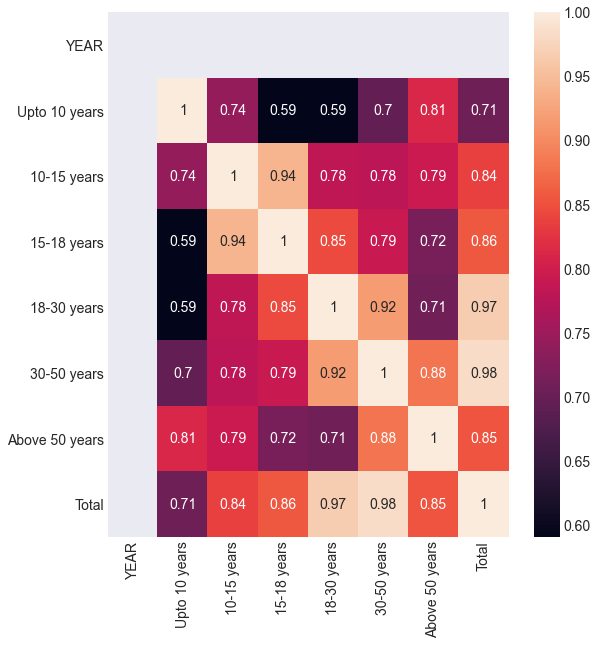

In [44]:
# heatmap correlation
import seaborn as sns
corr_hmap=murder.corr()
plt.figure(figsize=(8,9))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [45]:
murder.columns

Index(['STATE/UT', 'YEAR', 'GENDER', 'Upto 10 years', '10-15 years',
       '15-18 years', '18-30 years', '30-50 years', 'Above 50 years', 'Total'],
      dtype='object')

In [46]:
# lets analyze the total murders in each of the states

total  = murder[murder['GENDER'] == 'Total']
total

,STATE/UT,YEAR,GENDER,Upto 10 years,10-15 years,15-18 years,18-30 years,30-50 years,Above 50 years,Total
2,Andhra Pradesh,2013,Total,46,18,30,732,1336,322,2484
5,Arunachal Pradesh,2013,Total,0,1,2,34,31,1,69
8,Assam,2013,Total,0,3,11,895,399,46,1354
11,Bihar,2013,Total,44,36,106,1874,1231,150,3441
14,Chhattisgarh,2013,Total,45,20,46,289,400,174,974
17,Goa,2013,Total,0,0,0,16,12,9,37
20,Gujarat,2013,Total,77,10,10,440,452,173,1162
23,Haryana,2013,Total,27,15,45,452,382,87,1008
26,Himachal Pradesh,2013,Total,6,2,0,37,45,16,106
29,Jammu & Kashmir,2013,Total,10,3,0,61,97,13,184


In [47]:
total.index = ('Jammu & Kashmir', 'Kerala', 'Tamil Nadu', 'A&N Islands', 'Jharkhand',
       'Sikkim', 'Delhi UT', 'D&N Haveli', 'Punjab', 'Andhra Pradesh', 'Assam',
       'Himachal Pradesh', 'Maharashtra', 'Uttarakhand', 'Meghalaya',
       'West Bengal', 'Mizoram', 'Karnataka', 'Goa', 'Madhya Pradesh',
       'Gujarat', 'Lakshadweep', 'Rajasthan', 'Chhattisgarh', 'Manipur',
       'Arunachal Pradesh', 'Bihar', 'Chandigarh', 'Puducherry', 'Haryana',
       'Uttar Pradesh', 'Odisha', 'Tripura','Nagaland','Daman & Diu')
total.index

Index(['Jammu & Kashmir', 'Kerala', 'Tamil Nadu', 'A&N Islands', 'Jharkhand',
       'Sikkim', 'Delhi UT', 'D&N Haveli', 'Punjab', 'Andhra Pradesh', 'Assam',
       'Himachal Pradesh', 'Maharashtra', 'Uttarakhand', 'Meghalaya',
       'West Bengal', 'Mizoram', 'Karnataka', 'Goa', 'Madhya Pradesh',
       'Gujarat', 'Lakshadweep', 'Rajasthan', 'Chhattisgarh', 'Manipur',
       'Arunachal Pradesh', 'Bihar', 'Chandigarh', 'Puducherry', 'Haryana',
       'Uttar Pradesh', 'Odisha', 'Tripura', 'Nagaland', 'Daman & Diu'],
      dtype='object')

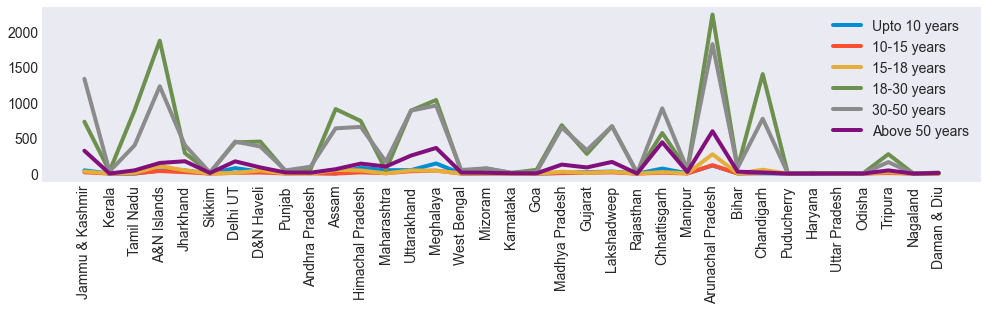

In [48]:

# lets plot a line chart

total = total.drop(['YEAR','GENDER','Total'], axis = 1)
total.plot(kind = 'line')
plt.xticks(rotation = 40)
plt.xticks(np.arange(35), ('Jammu & Kashmir', 'Kerala', 'Tamil Nadu', 'A&N Islands', 'Jharkhand',
       'Sikkim', 'Delhi UT', 'D&N Haveli', 'Punjab', 'Andhra Pradesh', 'Assam',
       'Himachal Pradesh', 'Maharashtra', 'Uttarakhand', 'Meghalaya',
       'West Bengal', 'Mizoram', 'Karnataka', 'Goa', 'Madhya Pradesh',
       'Gujarat', 'Lakshadweep', 'Rajasthan', 'Chhattisgarh', 'Manipur',
       'Arunachal Pradesh', 'Bihar', 'Chandigarh', 'Puducherry', 'Haryana',
       'Uttar Pradesh', 'Odisha', 'Tripura','Nagaland','Daman & Diu'),
        rotation = 90)
plt.show()

In [49]:
# lets check the gender column in the Murder dataset
murder['GENDER'].value_counts()

Female    35
Male      35
Total     35
Name: GENDER, dtype: int64

In [50]:
# lets create a data where we have only males and females in the gender column

genders = ['Male','Female']
gender = murder.loc[murder['GENDER'].isin(genders), :]
gender.head()

,STATE/UT,YEAR,GENDER,Upto 10 years,10-15 years,15-18 years,18-30 years,30-50 years,Above 50 years,Total
0,Andhra Pradesh,2013,Male,26,9,19,445,1036,199,1734
1,Andhra Pradesh,2013,Female,20,9,11,287,300,123,750
3,Arunachal Pradesh,2013,Male,0,0,1,32,31,1,65
4,Arunachal Pradesh,2013,Female,0,1,1,2,0,0,4
6,Assam,2013,Male,0,3,11,827,370,46,1257


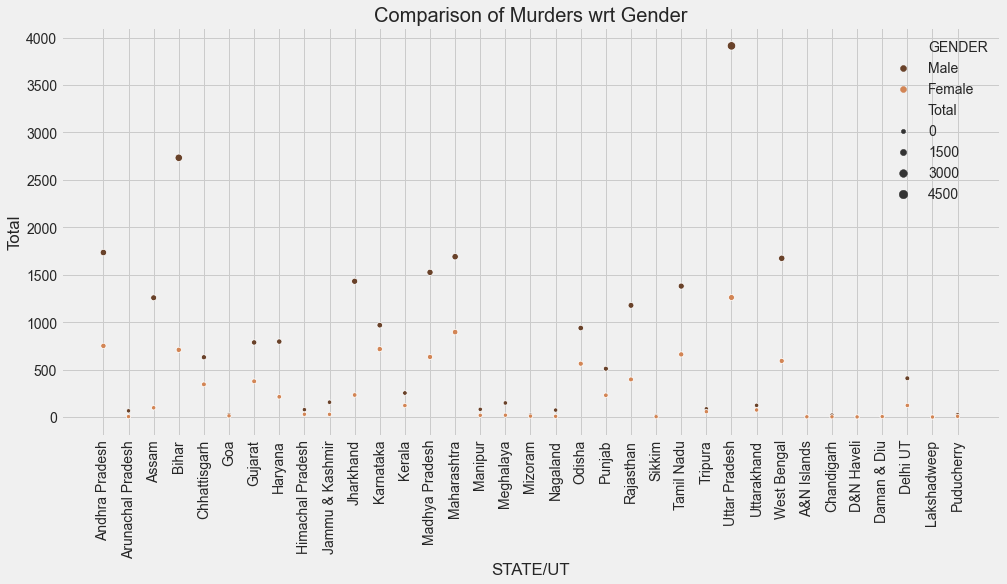

In [51]:

# lets make a comparison of murders between males and females

plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('fivethirtyeight')

sns.scatterplot(gender['STATE/UT'],
               gender['Total'],
               hue = gender['GENDER'],
               palette = 'copper',
                size = gender['Total'],
            )
plt.title('Comparison of Murders wrt Gender', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [52]:
murder['YEAR'].value_counts()

2013    105
Name: YEAR, dtype: int64

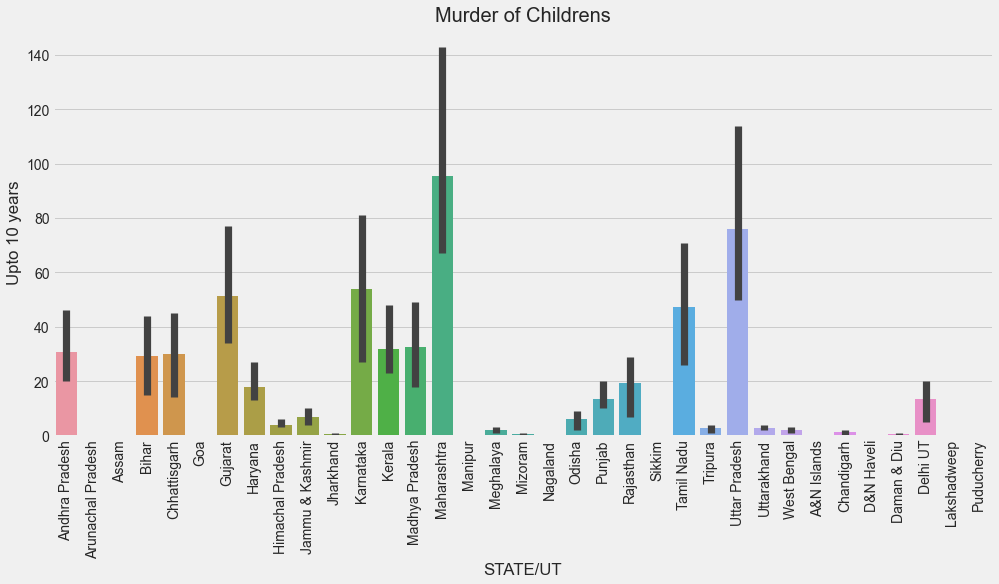

In [53]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('fivethirtyeight')

sns.barplot(murder['STATE/UT'],
            murder['Upto 10 years'],
            )
plt.xticks(rotation = 90)
plt.title('Murder of Childrens', fontsize = 20)
plt.show()


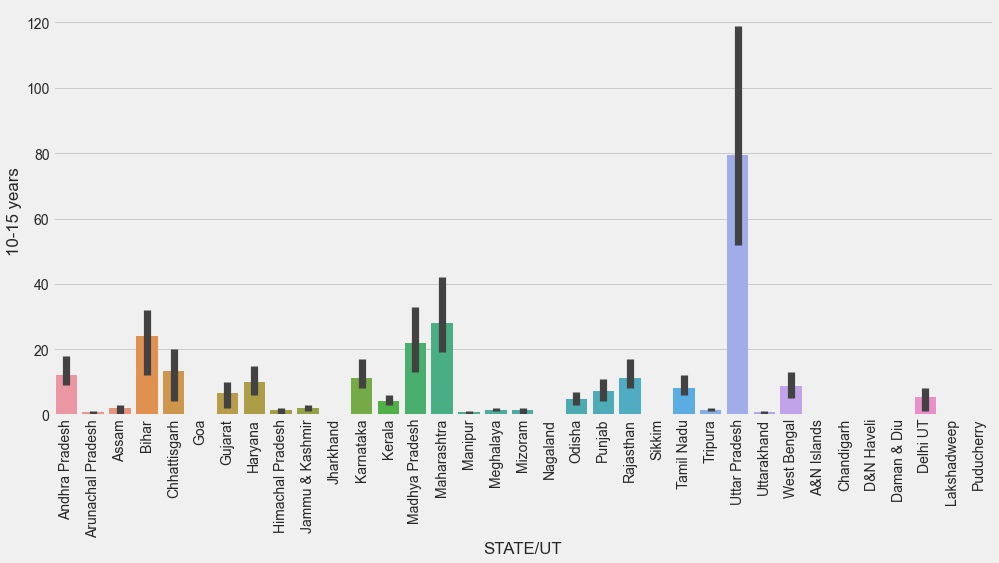

In [54]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('fivethirtyeight')

sns.barplot(murder['STATE/UT'],
            murder['10-15 years'],
            )
plt.xticks(rotation = 90)
plt.show()

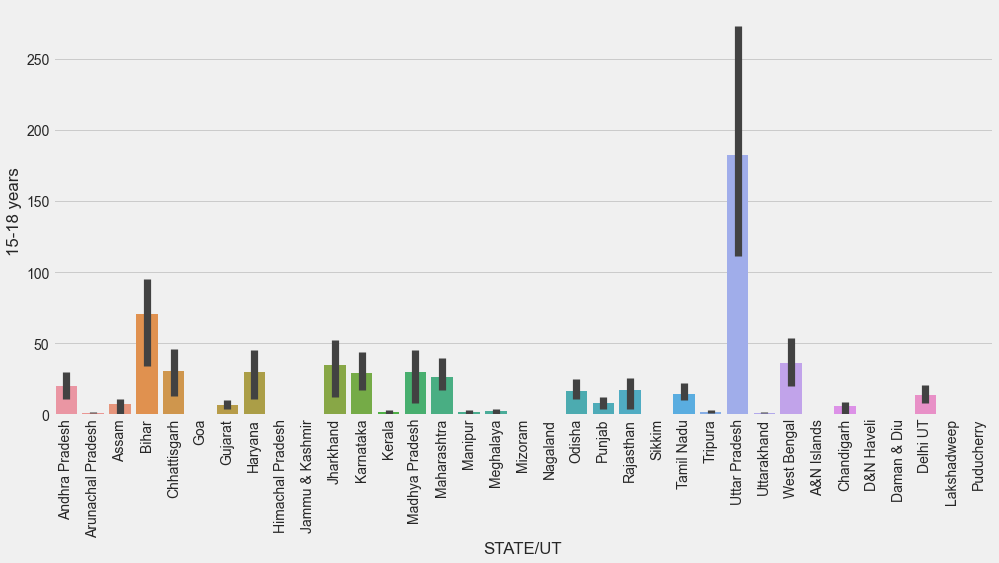

In [55]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('fivethirtyeight')

sns.barplot(murder['STATE/UT'],
            murder['15-18 years'],
            )
plt.xticks(rotation = 90)
plt.show()

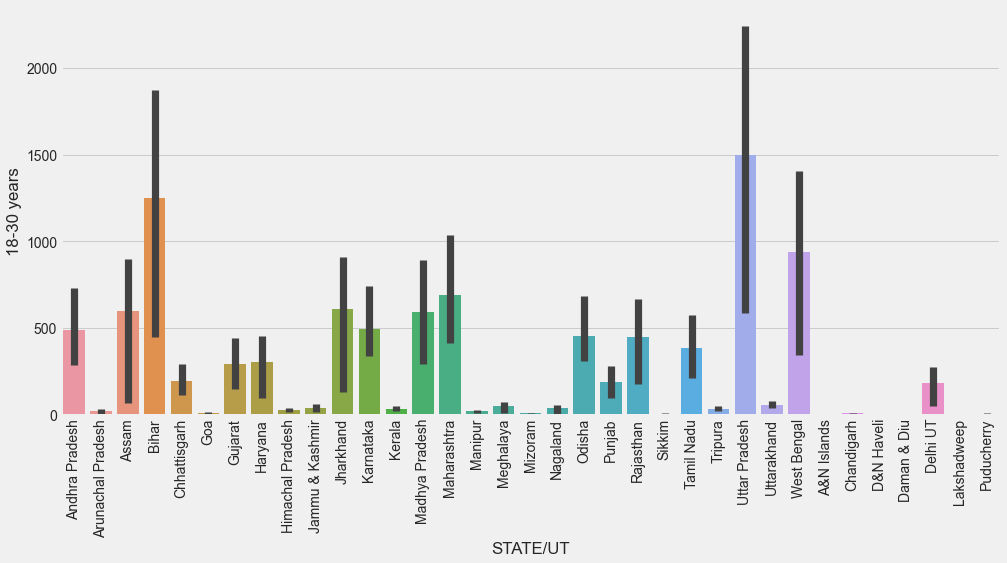

In [56]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('fivethirtyeight')

sns.barplot(murder['STATE/UT'],
            murder['18-30 years'],
            )
plt.xticks(rotation = 90)
plt.show()

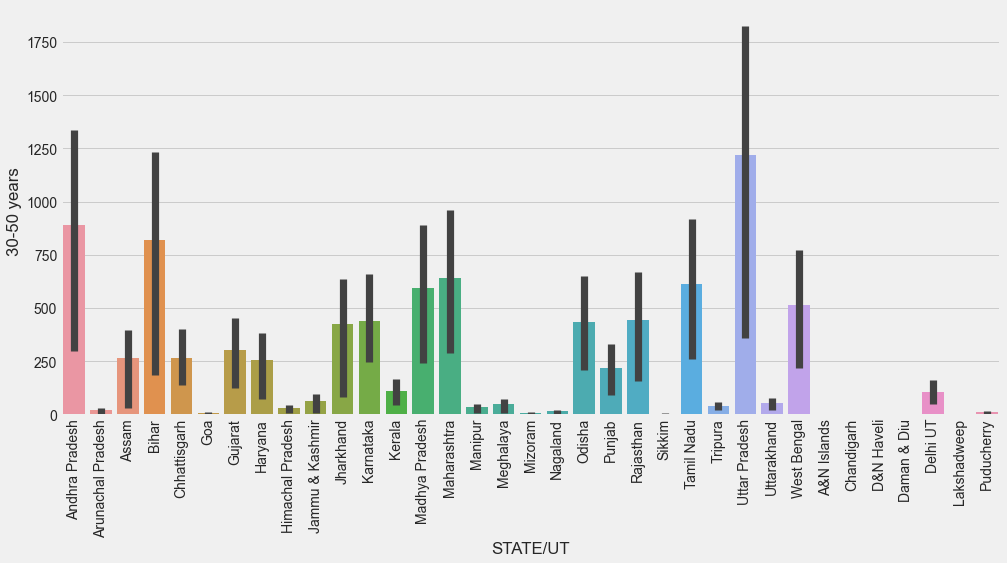

In [57]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('fivethirtyeight')

sns.barplot(murder['STATE/UT'],
            murder['30-50 years'],
            )
plt.xticks(rotation = 90)
plt.show()

In [58]:

x = murder.pivot_table(index = 'STATE/UT',
                       columns = 'GENDER',
                       values = ['Upto 10 years', 
                            '10-15 years',
                            '15-18 years',
                            '18-30 years',
                            '30-50 years',
                            'Above 50 years']
                                   )
plt.rcParams['figure.figsize'] = (10, 2)
print(x)

                  10-15 years            15-18 years            18-30 years  \
GENDER                 Female Male Total      Female Male Total      Female   
STATE/UT                                                                      
A&N Islands                 0    0     0           0    0     0           0   
Andhra Pradesh              9    9    18          11   19    30         287   
Arunachal Pradesh           1    0     1           1    1     2           2   
Assam                       0    3     3           0   11    11          68   
Bihar                      12   24    36          34   72   106         446   
Chandigarh                  0    0     0           0    9     9           0   
Chhattisgarh                4   16    20          13   33    46         113   
D&N Haveli                  0    0     0           0    0     0           0   
Daman & Diu                 0    0     0           0    0     0           2   
Delhi UT                    1    7     8           8

# Property Stolen and Recovered

In [59]:
property=pd.read_csv("property.csv")
property

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937
...,...,...,...,...,...,...,...,...
2444,Tamil Nadu,2010,Total Property,7. Total Property Stolen & Recovered,16125,21509,660311804,1317919190
2445,Tripura,2010,Total Property,7. Total Property Stolen & Recovered,192,879,5666102,33032746
2446,Uttar Pradesh,2010,Total Property,7. Total Property Stolen & Recovered,9130,35068,577591772,1442670414
2447,Uttarakhand,2010,Total Property,7. Total Property Stolen & Recovered,964,2234,47135685,123398840


In [60]:
property.isnull().sum()

Area_Name                      0
Year                           0
Group_Name                     0
Sub_Group_Name                 0
Cases_Property_Recovered       0
Cases_Property_Stolen          0
Value_of_Property_Recovered    0
Value_of_Property_Stolen       0
dtype: int64

In [61]:
property.describe()

,Year,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
count,2449.000000,2449.000000,2449.000000,2.449000e+03,2.449000e+03
mean,2005.499388,1232.892201,3419.420988,5.859924e+07,2.465431e+08
std,2.873294,3079.573907,8136.256820,2.494403e+08,9.670035e+08
min,2001.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2003.000000,13.000000,45.000000,6.845700e+05,3.649018e+06
50%,2005.000000,113.000000,358.000000,5.851830e+06,2.701800e+07
75%,2008.000000,722.000000,1875.000000,3.406395e+07,1.214580e+08
max,2010.000000,27960.000000,80663.000000,7.470011e+09,2.377625e+10


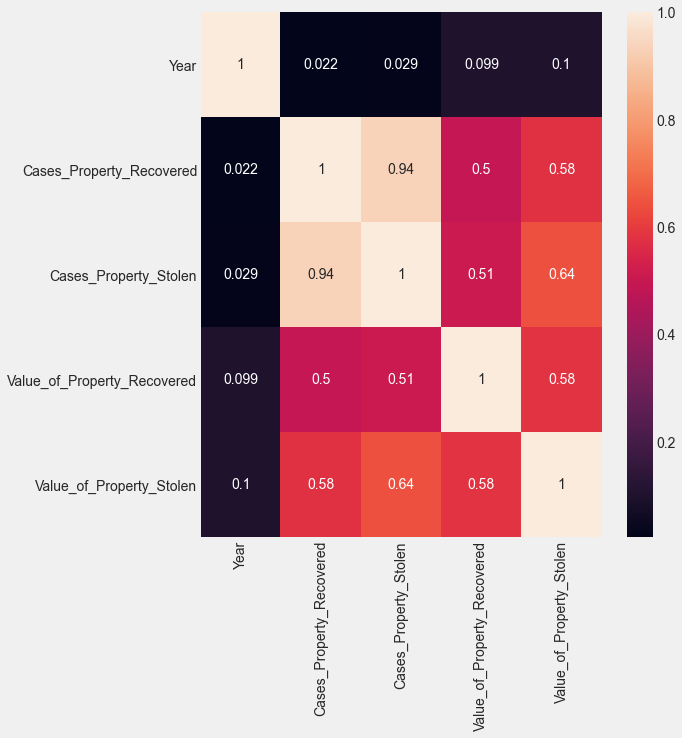

In [62]:
#heatmap correlation
import seaborn as sns
corr_hmap=property.corr()
plt.figure(figsize=(8,9))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [63]:
# dropping the unnecessary column......as it alredy contains column group name both are same almost
property1=property.drop(['Sub_Group_Name'],axis=1)

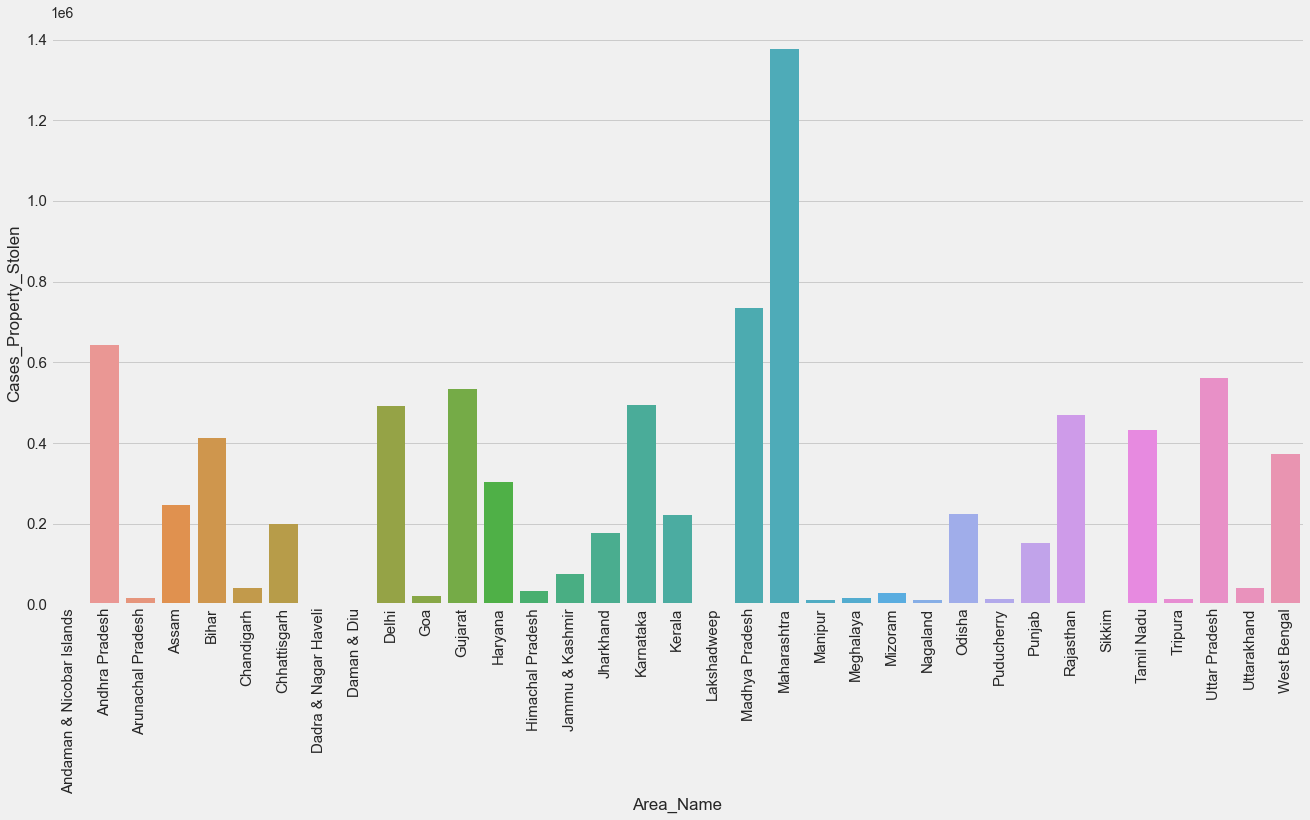

In [64]:
property_bystate=property1.groupby(['Area_Name'],as_index=False).sum()
property_bystate.drop("Year",axis=1,inplace=True)
plt.figure(figsize = (20, 10))
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
sns.barplot(x=property_bystate.Area_Name,y=property_bystate.Cases_Property_Stolen)

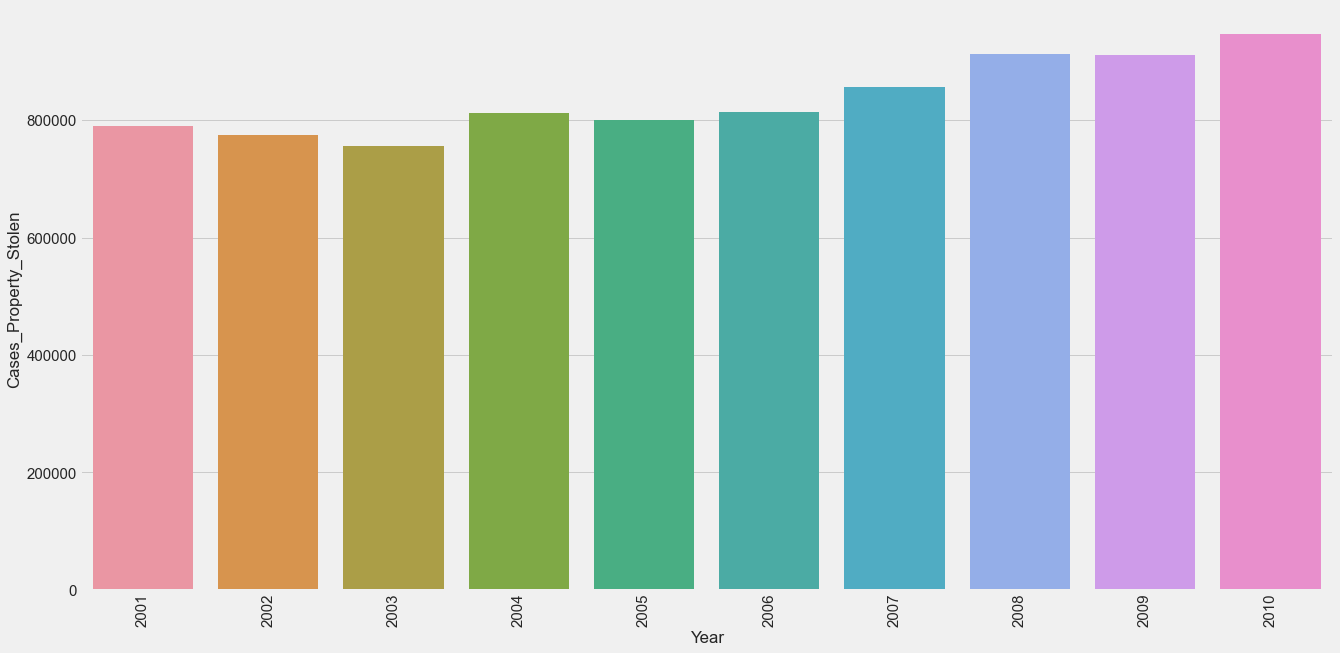

In [65]:
#Cases of Property Stolen across the year of all the States 
sortbyyear=property1.groupby(['Year'],as_index=False).sum()
plt.figure(figsize = (20, 10))
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
sns.barplot(x=sortbyyear.Year,y=sortbyyear.Cases_Property_Stolen)


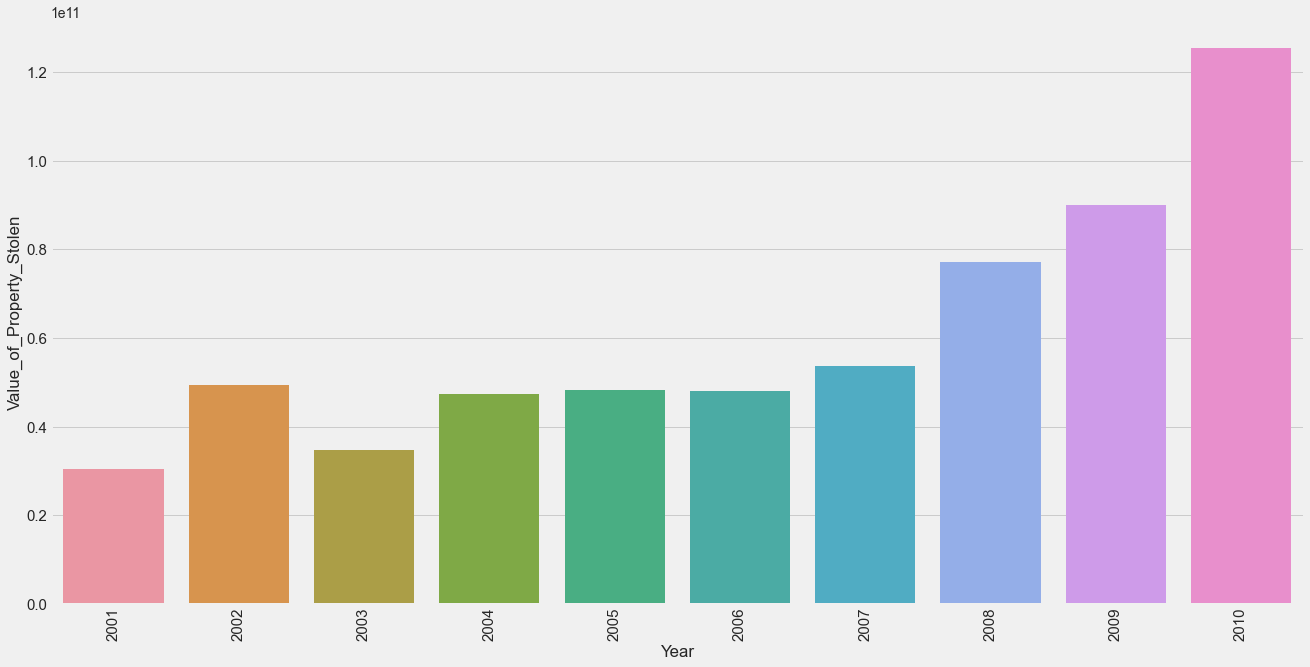

In [66]:
#Value of Property Stolen across the year of all the States 

plt.figure(figsize = (20, 10))
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
sns.barplot(x=sortbyyear.Year,y=sortbyyear.Value_of_Property_Stolen)


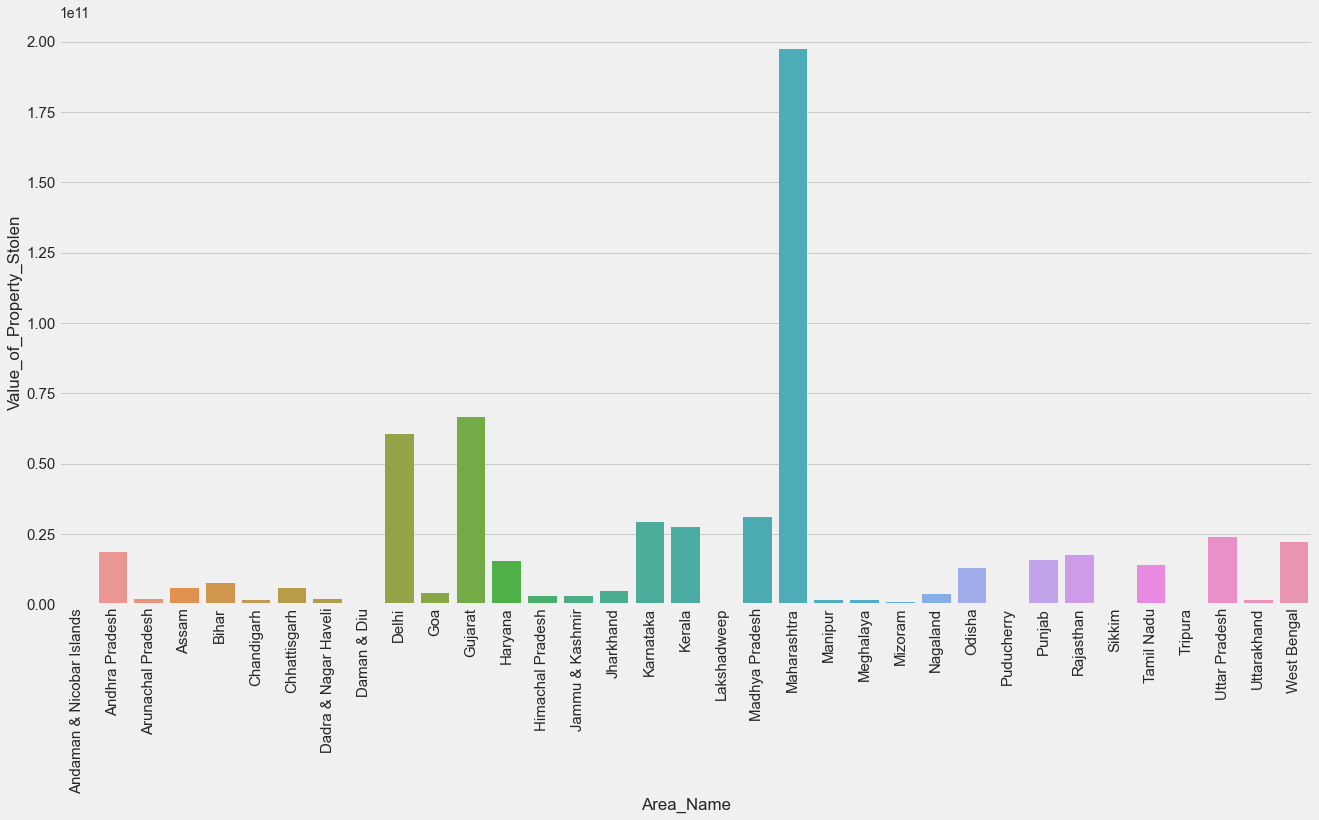

In [67]:
# proprety stolen Areawise
plt.figure(figsize = (20, 10))
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
sns.barplot(x=property_bystate.Area_Name,y=property_bystate.Value_of_Property_Stolen)


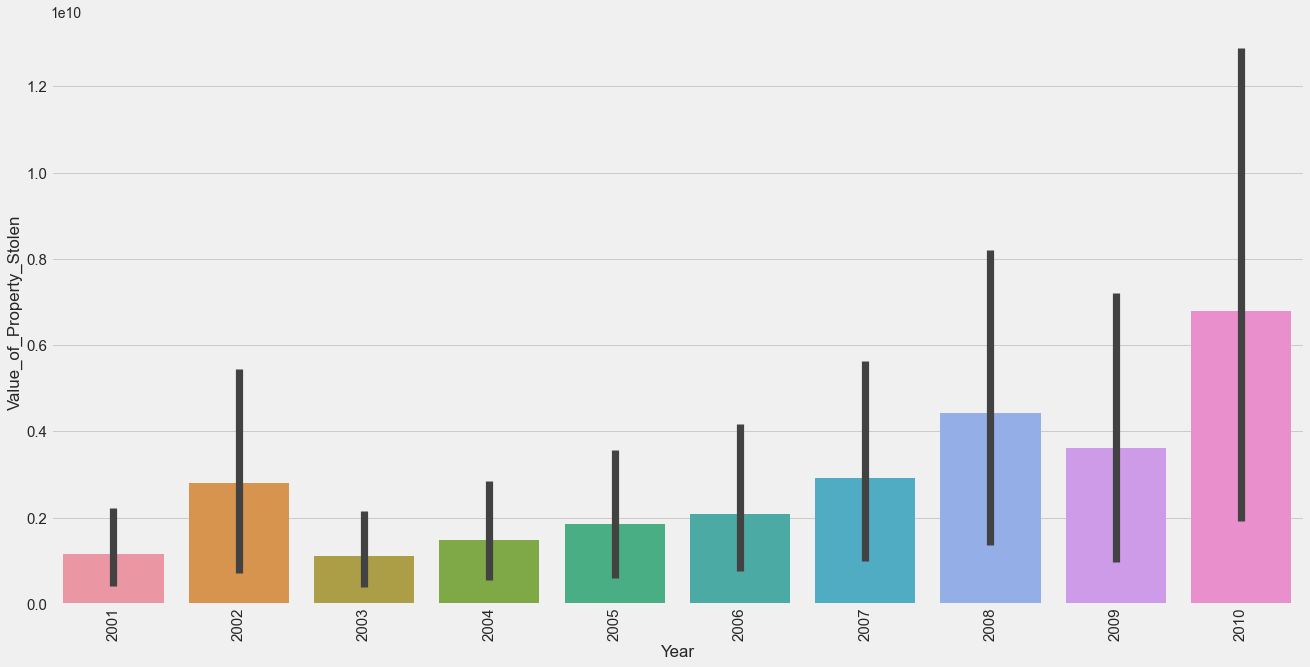

In [68]:
# value of property stolen in maharastra
a=property1.groupby(['Area_Name']).get_group('Maharashtra')
plt.figure(figsize = (20, 10))
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
sns.barplot(x=a.Year,y=a.Value_of_Property_Stolen)


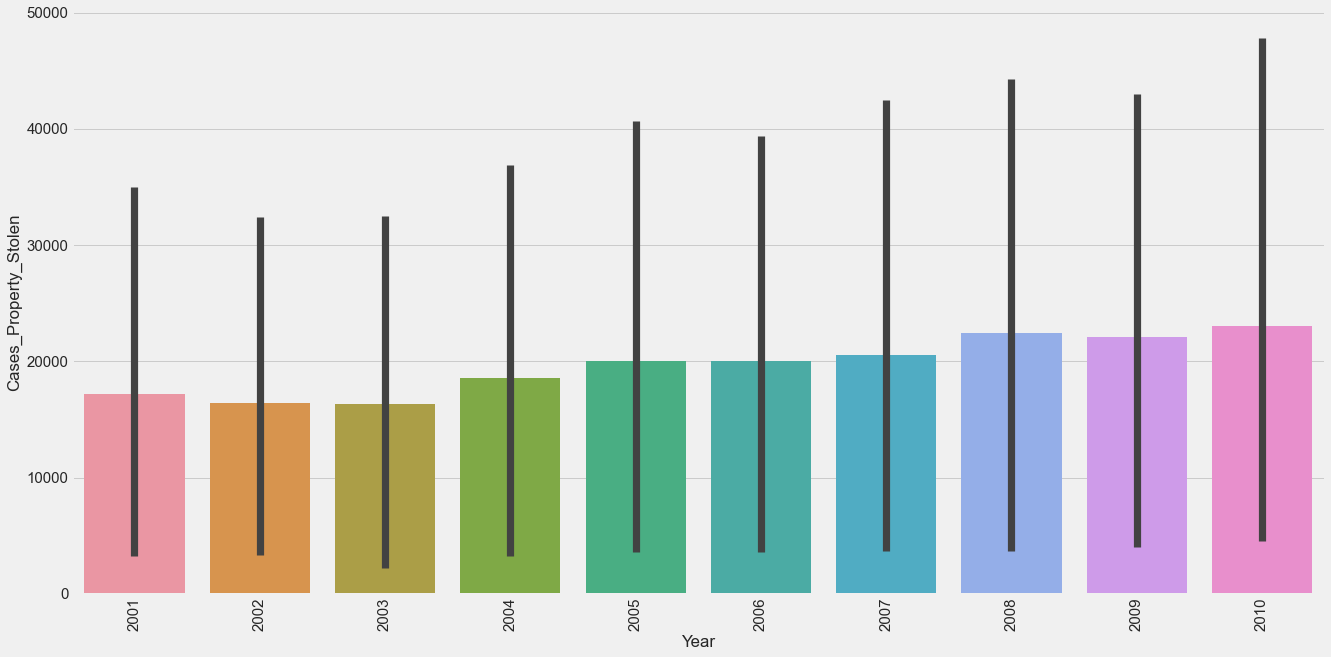

In [69]:
# cases of property stolen in Maharastra
a=property1.groupby(['Area_Name']).get_group('Maharashtra')
plt.figure(figsize = (20, 10))
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
sns.barplot(x=a.Year,y=a.Cases_Property_Stolen)


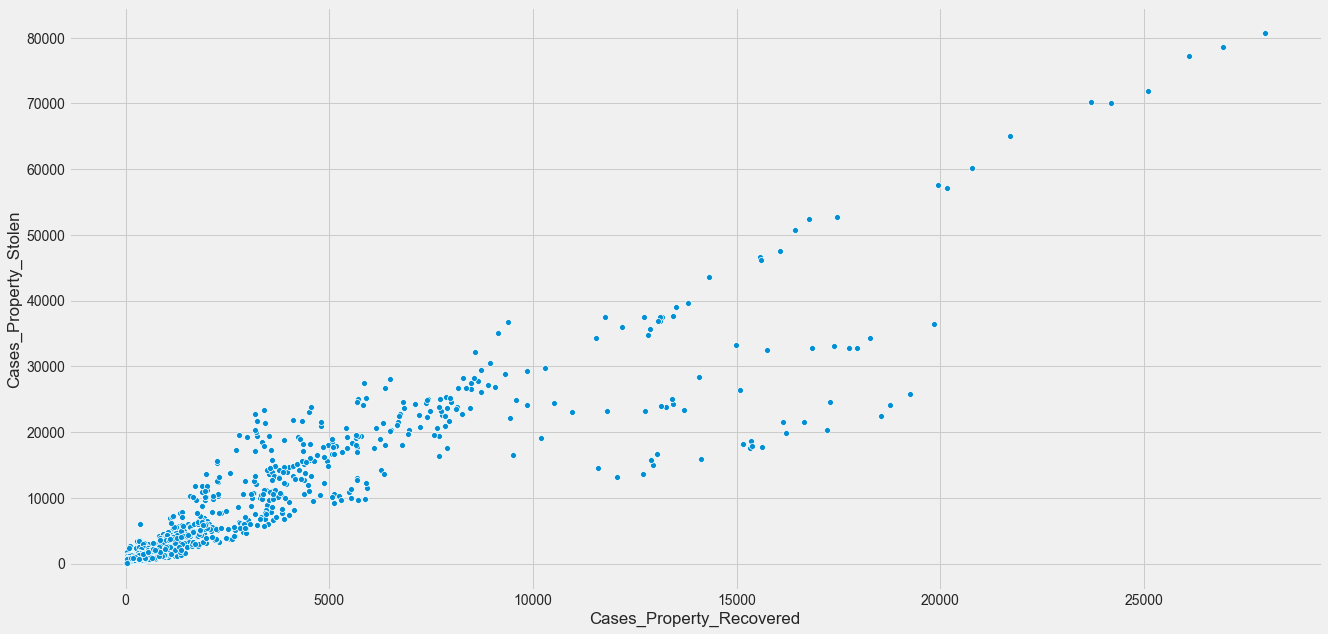

In [70]:
# Scatter plot for property stolen and recovered
plt.figure(figsize = (20, 10))
sns.scatterplot(x=property.Cases_Property_Recovered,y=property.Cases_Property_Stolen)